In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('supermarket_sales.csv')

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
data['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [55]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [19]:
salesByCity = data.groupby('City')['Total'].sum()

In [21]:
salesByCity

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

In [33]:
customerType=data['Customer type'].value_counts()

In [35]:
customerType

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [51]:
productLine=data.groupby('Product line')['Total'].sum()

In [53]:
productLine

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [69]:
averageUnitPrice = data.groupby('Product line')['Unit price'].mean()

In [71]:
averageUnitPrice

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

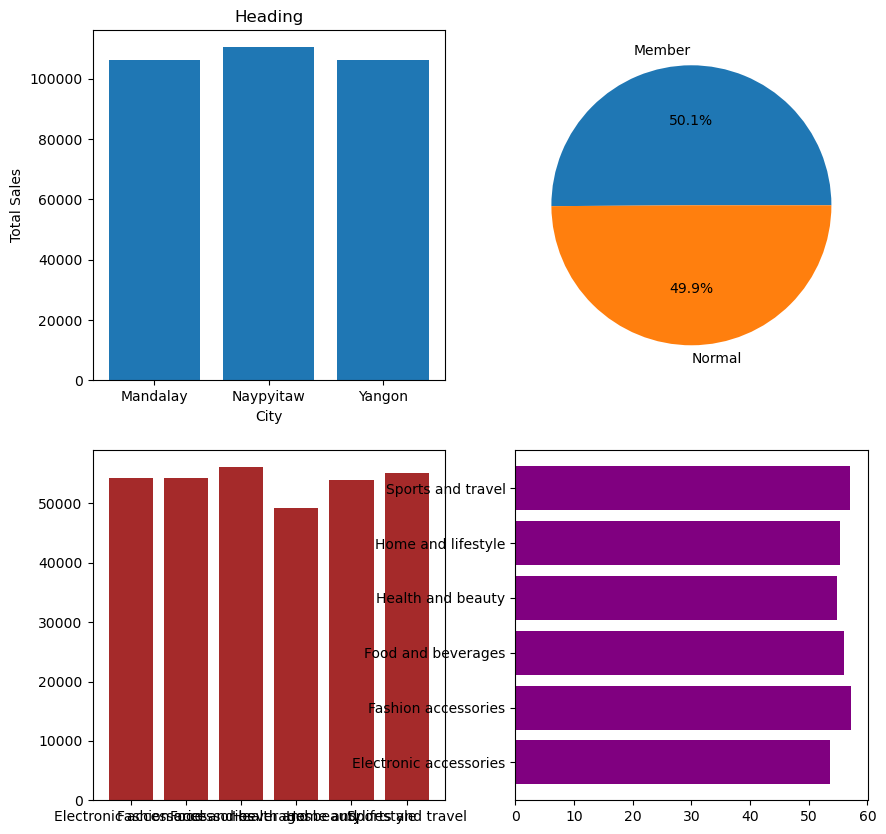

In [77]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].bar(salesByCity.index, salesByCity.values)
ax[0,0].set_title('Heading')
ax[0,0].set_xlabel('City')
ax[0,0].set_ylabel('Total Sales')


ax[0,1].pie(customerType, labels = customerType.index, autopct = "%1.01f%%")
ax[1,0].bar(productLine.index, productLine.values, color='brown')
ax[1,1].barh(averageUnitPrice.index, averageUnitPrice.values, color='purple')
plt.show